# Import plaintext

In [1]:
import csv
import numpy as np
pt = []
with open('../../Downloads/picoaes_4k_ckey.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        pt.append(row['input'])
        #print(row['input'], row['output'])

In [2]:
pt_array = []
for i in range (1300):
    b = bytes.fromhex(pt[i])
    one_array = np.frombuffer(b,dtype=np.uint8)
    pt_array.append(one_array)
print(len(pt_array))
print(len(pt_array[0]))
pt_array[0]

1300
16


array([ 12, 254, 222,  85, 228,  37,  52,   3, 231, 131,  53,  81, 180,
       113, 187,  69], dtype=uint8)

# Import key

In [3]:
import csv
import numpy as np
key = []
with open('../../Downloads/picoaes_4k_ckey.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        key = row['key']

In [4]:
key

'00112233445566778899aabbccddeeff'

In [5]:
key_array = []
b = bytes.fromhex(key)
one_array = np.frombuffer(b,dtype=np.uint8)
key_array = one_array
#key_array.append(one_array)
key_array

array([  0,  17,  34,  51,  68,  85, 102, 119, 136, 153, 170, 187, 204,
       221, 238, 255], dtype=uint8)

# Import traces

In [6]:
import glob
import matplotlib.pylab as plt
NumofTraces = 500
str_trace = []

path = "../../Downloads/g800/*.csv"
for filename in sorted(glob.glob(path, recursive=True),key = lambda x: x[-27:]):
    #print(filename)
    with open(filename, 'r') as f:
        lines = f.readlines()
        str_trace.append(lines)
print(len(str_trace))
print(len(str_trace[0]))

1300
513


In [7]:
trace_array_y = []
for i in range (len(str_trace)):
    b = [float(x) for x in str_trace[i]]
    trace_array_y.append(b)

Text(0.5, 1.0, 'COAES PICO JOULES FULL POWER Plot')

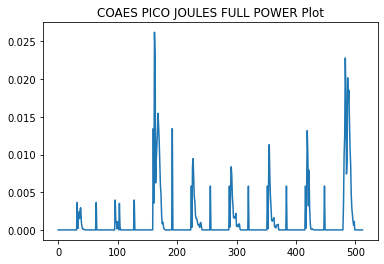

In [8]:
plt.plot(trace_array_y[0])
plt.title('COAES PICO JOULES FULL POWER Plot')
#plt.savefig('trace.jpg',dpi=100) # save jpg/png

In [9]:
np.array(trace_array_y[0]).tofile("g800_power.bin")

In [10]:
trace_array_y = np.array(trace_array_y)

In [11]:
print(len(key_array))
print(len(pt_array))
print(len(pt_array[0]))
print(len(trace_array_y))
print(len(trace_array_y[0]))

16
1300
16
1300
513


# SBox

In [11]:
sbox = (
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

HW = [bin(n).count("1") for n in range(0, 256)]

In [47]:
HW = [bin(n).count("1") for n in range(0, 256)]

def calculate_diffs(guess, byteindex):

    one_list_calc = []
    zero_list_calc = []

    for trace_index in range(len(trace_array_y)):
        #hypothetical_leakage = intermediate(guess, pt_array[trace_index][byteindex])
        st1 = pt_array[trace_index][byteindex] ^ guess
        st2 = sbox[st1]
        hypothetical_leakage = st1 ^ st2

        if (HW[hypothetical_leakage] > 4 ):
            one_list_calc.append(trace_array_y[trace_index])
        elif (HW[hypothetical_leakage] < 4):
            zero_list_calc.append(trace_array_y[trace_index])

    one_avg_calc = np.asarray(one_list_calc).mean(axis=0)
    zero_avg_calc = np.asarray(zero_list_calc).mean(axis=0)
    return abs(one_avg_calc - zero_avg_calc)

In [49]:
from tqdm.notebook import trange

key_guess = []
full_diffs_list = []
known_key = key_array

for subkey in trange(0, 16):
    max_diffs = [0]*256
    full_diffs = [0]*256
    for guess in trange(0, 256):
        full_diff_trace = calculate_diffs(guess, subkey)
        max_diffs[guess] = np.max(full_diff_trace)
        full_diffs[guess] = full_diff_trace
        
    #Make copy of the list
    full_diffs_list.append(full_diffs[:])

    #Get argument sort, as each index is the actual key guess.
    sorted_args = np.argsort(max_diffs)[::-1]

    #Keep most likely
    key_guess.append(sorted_args[0])

    #Print results
    print("Subkey %2d - most likely %02X (actual %02X)"%(subkey, key_guess[subkey], known_key[subkey]))

    #Print other top guesses
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, max_diffs[g]))

    print("\n")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  0 - most likely 00 (actual 00)
 Top 5 guesses: 
   00 - Diff = 0.001615
   28 - Diff = 0.000539
   72 - Diff = 0.000518
   23 - Diff = 0.000474
   9F - Diff = 0.000456




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  1 - most likely 11 (actual 11)
 Top 5 guesses: 
   11 - Diff = 0.001470
   4C - Diff = 0.000485
   50 - Diff = 0.000464
   EB - Diff = 0.000387
   B5 - Diff = 0.000383




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  2 - most likely 22 (actual 22)
 Top 5 guesses: 
   22 - Diff = 0.001379
   B4 - Diff = 0.000482
   97 - Diff = 0.000425
   0F - Diff = 0.000424
   A1 - Diff = 0.000411




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  3 - most likely 33 (actual 33)
 Top 5 guesses: 
   33 - Diff = 0.001448
   6E - Diff = 0.000450
   B7 - Diff = 0.000434
   1B - Diff = 0.000375
   D8 - Diff = 0.000364




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  4 - most likely 44 (actual 44)
 Top 5 guesses: 
   44 - Diff = 0.001619
   67 - Diff = 0.000630
   18 - Diff = 0.000546
   7D - Diff = 0.000537
   A4 - Diff = 0.000449




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  5 - most likely 55 (actual 55)
 Top 5 guesses: 
   55 - Diff = 0.001538
   C3 - Diff = 0.000528
   7D - Diff = 0.000461
   27 - Diff = 0.000451
   59 - Diff = 0.000442




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  6 - most likely 66 (actual 66)
 Top 5 guesses: 
   66 - Diff = 0.001530
   37 - Diff = 0.000657
   86 - Diff = 0.000532
   0D - Diff = 0.000472
   74 - Diff = 0.000436




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  7 - most likely 77 (actual 77)
 Top 5 guesses: 
   77 - Diff = 0.001701
   96 - Diff = 0.000626
   34 - Diff = 0.000475
   A4 - Diff = 0.000473
   08 - Diff = 0.000471




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  8 - most likely 88 (actual 88)
 Top 5 guesses: 
   88 - Diff = 0.001621
   26 - Diff = 0.000546
   53 - Diff = 0.000468
   75 - Diff = 0.000453
   A0 - Diff = 0.000446




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  9 - most likely 99 (actual 99)
 Top 5 guesses: 
   99 - Diff = 0.001817
   0F - Diff = 0.000581
   78 - Diff = 0.000540
   BA - Diff = 0.000536
   2C - Diff = 0.000501




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 10 - most likely AA (actual AA)
 Top 5 guesses: 
   AA - Diff = 0.001448
   EE - Diff = 0.000552
   04 - Diff = 0.000486
   D8 - Diff = 0.000469
   62 - Diff = 0.000436




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 11 - most likely BB (actual BB)
 Top 5 guesses: 
   BB - Diff = 0.001575
   D7 - Diff = 0.000593
   1A - Diff = 0.000515
   DC - Diff = 0.000512
   3D - Diff = 0.000488




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 12 - most likely CC (actual CC)
 Top 5 guesses: 
   CC - Diff = 0.001867
   88 - Diff = 0.000552
   A3 - Diff = 0.000533
   B4 - Diff = 0.000513
   7D - Diff = 0.000502




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 13 - most likely DD (actual DD)
 Top 5 guesses: 
   DD - Diff = 0.001939
   5B - Diff = 0.000598
   33 - Diff = 0.000557
   0E - Diff = 0.000551
   AF - Diff = 0.000534




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 14 - most likely EE (actual EE)
 Top 5 guesses: 
   EE - Diff = 0.002063
   B2 - Diff = 0.000809
   B3 - Diff = 0.000628
   40 - Diff = 0.000581
   FF - Diff = 0.000543




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 15 - most likely FF (actual FF)
 Top 5 guesses: 
   FF - Diff = 0.001963
   A2 - Diff = 0.000680
   69 - Diff = 0.000642
   35 - Diff = 0.000572
   43 - Diff = 0.000561




In [50]:
max_list = []
for subkey in range (16):
    corr = abs(full_diffs_list[subkey][known_key[subkey]])
    ymax = corr.max()
    max_list.append(ymax)

In [51]:
np.array(max_list).tofile("g800_dpa.bin")

# CPA Attack -- Method 1

In [12]:
from tqdm.notebook import trange
numtraces = len(trace_array_y) #total number of traces
numpoint = len(trace_array_y[0]) #samples per trace

key_guess = []
full_cpa_list = []
known_key = key_array

for bnum in trange(0, 16):
    cpaoutput = [0] * 256
    maxcpa = [0] * 256
    for kguess in trange(0, 256):

        # Initialize arrays &amp; variables to zero
        sumnum = np.zeros(numpoint)
        sumden1 = np.zeros(numpoint)
        sumden2 = np.zeros(numpoint)
        
        hyp = np.zeros(numtraces)
        for tnum in range(0, numtraces):
                st1 = pt_array[tnum][bnum] ^ kguess
                st2 = sbox[st1]
                hyp[tnum] = HW[st1 ^ st2]
                #hyp[tnum] = st1 ^ st2

        # Mean of hypothesis
        meanh = np.mean(hyp, dtype=np.float64)

        # Mean of all points in trace
        meant = np.mean(trace_array_y, axis=0, dtype=np.float64)

        # For each trace, do the following
        for tnum in range(0, numtraces):
            hdiff = (hyp[tnum] - meanh)
            tdiff = trace_array_y[tnum, :] - meant

            sumnum = sumnum + (hdiff * tdiff)
            sumden1 = sumden1 + hdiff * hdiff
            sumden2 = sumden2 + tdiff * tdiff

        cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
        maxcpa[kguess] = max(abs(cpaoutput[kguess]))

    full_cpa_list.append(cpaoutput)
    #np.array(full_cpa_list[bnum]).tofile("new_cpa_byte%2d.bin" %(bnum))
    sorted_args = np.argsort(maxcpa)[::-1]
    key_guess.append(sorted_args[0])
    print("Subkey %2d - most likely %02X (actual %02X)"%(bnum, key_guess[bnum], known_key[bnum]))
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, maxcpa[g]))
    print("\n")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  0 - most likely 00 (actual 00)
 Top 5 guesses: 
   00 - Diff = 0.506275
   51 - Diff = 0.212365
   F2 - Diff = 0.197835
   CE - Diff = 0.179151
   21 - Diff = 0.177213




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  1 - most likely 11 (actual 11)
 Top 5 guesses: 
   11 - Diff = 0.489601
   50 - Diff = 0.164371
   E6 - Diff = 0.158803
   09 - Diff = 0.157487
   7E - Diff = 0.157249




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  2 - most likely 22 (actual 22)
 Top 5 guesses: 
   22 - Diff = 0.453229
   61 - Diff = 0.156299
   5E - Diff = 0.154292
   CC - Diff = 0.144958
   41 - Diff = 0.139649




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  3 - most likely 33 (actual 33)
 Top 5 guesses: 
   33 - Diff = 0.470354
   68 - Diff = 0.146529
   C4 - Diff = 0.141807
   65 - Diff = 0.135235
   6E - Diff = 0.133388




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  4 - most likely 44 (actual 44)
 Top 5 guesses: 
   44 - Diff = 0.502675
   0C - Diff = 0.177290
   18 - Diff = 0.168542
   67 - Diff = 0.152724
   7D - Diff = 0.149073




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  5 - most likely 55 (actual 55)
 Top 5 guesses: 
   55 - Diff = 0.542862
   C3 - Diff = 0.198350
   18 - Diff = 0.147903
   16 - Diff = 0.142967
   E0 - Diff = 0.140852




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  6 - most likely 66 (actual 66)
 Top 5 guesses: 
   66 - Diff = 0.524680
   D4 - Diff = 0.156123
   86 - Diff = 0.155764
   37 - Diff = 0.155244
   09 - Diff = 0.152065




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  7 - most likely 77 (actual 77)
 Top 5 guesses: 
   77 - Diff = 0.470113
   A4 - Diff = 0.154830
   90 - Diff = 0.145448
   54 - Diff = 0.139098
   96 - Diff = 0.137624




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  8 - most likely 88 (actual 88)
 Top 5 guesses: 
   88 - Diff = 0.530408
   75 - Diff = 0.152815
   27 - Diff = 0.148374
   D5 - Diff = 0.134676
   E7 - Diff = 0.130640




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  9 - most likely 99 (actual 99)
 Top 5 guesses: 
   99 - Diff = 0.501766
   4A - Diff = 0.150590
   0F - Diff = 0.145283
   88 - Diff = 0.134678
   2C - Diff = 0.134082




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 10 - most likely AA (actual AA)
 Top 5 guesses: 
   AA - Diff = 0.426569
   EE - Diff = 0.130015
   4C - Diff = 0.121032
   C9 - Diff = 0.117158
   E2 - Diff = 0.116316




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 11 - most likely BB (actual BB)
 Top 5 guesses: 
   BB - Diff = 0.447149
   D7 - Diff = 0.149557
   0E - Diff = 0.136552
   FF - Diff = 0.130836
   1A - Diff = 0.127443




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 12 - most likely CC (actual CC)
 Top 5 guesses: 
   CC - Diff = 0.483019
   8A - Diff = 0.194846
   A3 - Diff = 0.154809
   EF - Diff = 0.152185
   CB - Diff = 0.144240




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 13 - most likely DD (actual DD)
 Top 5 guesses: 
   DD - Diff = 0.497305
   D6 - Diff = 0.172197
   EA - Diff = 0.163408
   33 - Diff = 0.148837
   86 - Diff = 0.148672




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 14 - most likely EE (actual EE)
 Top 5 guesses: 
   EE - Diff = 0.510054
   B2 - Diff = 0.177249
   FF - Diff = 0.154004
   EA - Diff = 0.145183
   81 - Diff = 0.137671




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 15 - most likely FF (actual FF)
 Top 5 guesses: 
   FF - Diff = 0.466469
   69 - Diff = 0.167067
   A2 - Diff = 0.154053
   D7 - Diff = 0.134015
   41 - Diff = 0.129911




In [13]:
max_list = []
for subkey in range (16):
    corr = abs(full_cpa_list[subkey][known_key[subkey]])
    ymax = corr.max()
    max_list.append(ymax)

In [14]:
np.array(max_list).tofile("g800_cpa.bin")

In [17]:
max_list

[0.5053387665955006,
 0.46871972126225253,
 0.4661502374433682,
 0.4810181638179054,
 0.5084972474292332,
 0.5305317951316212,
 0.5270784904250465,
 0.4547260251951927,
 0.5289250985816659,
 0.4882050562953814,
 0.44256446798356625,
 0.4479828745648805,
 0.4811056451209942,
 0.5064952966557009,
 0.5062196410538053,
 0.46306786792635873]

<Figure size 432x288 with 0 Axes>

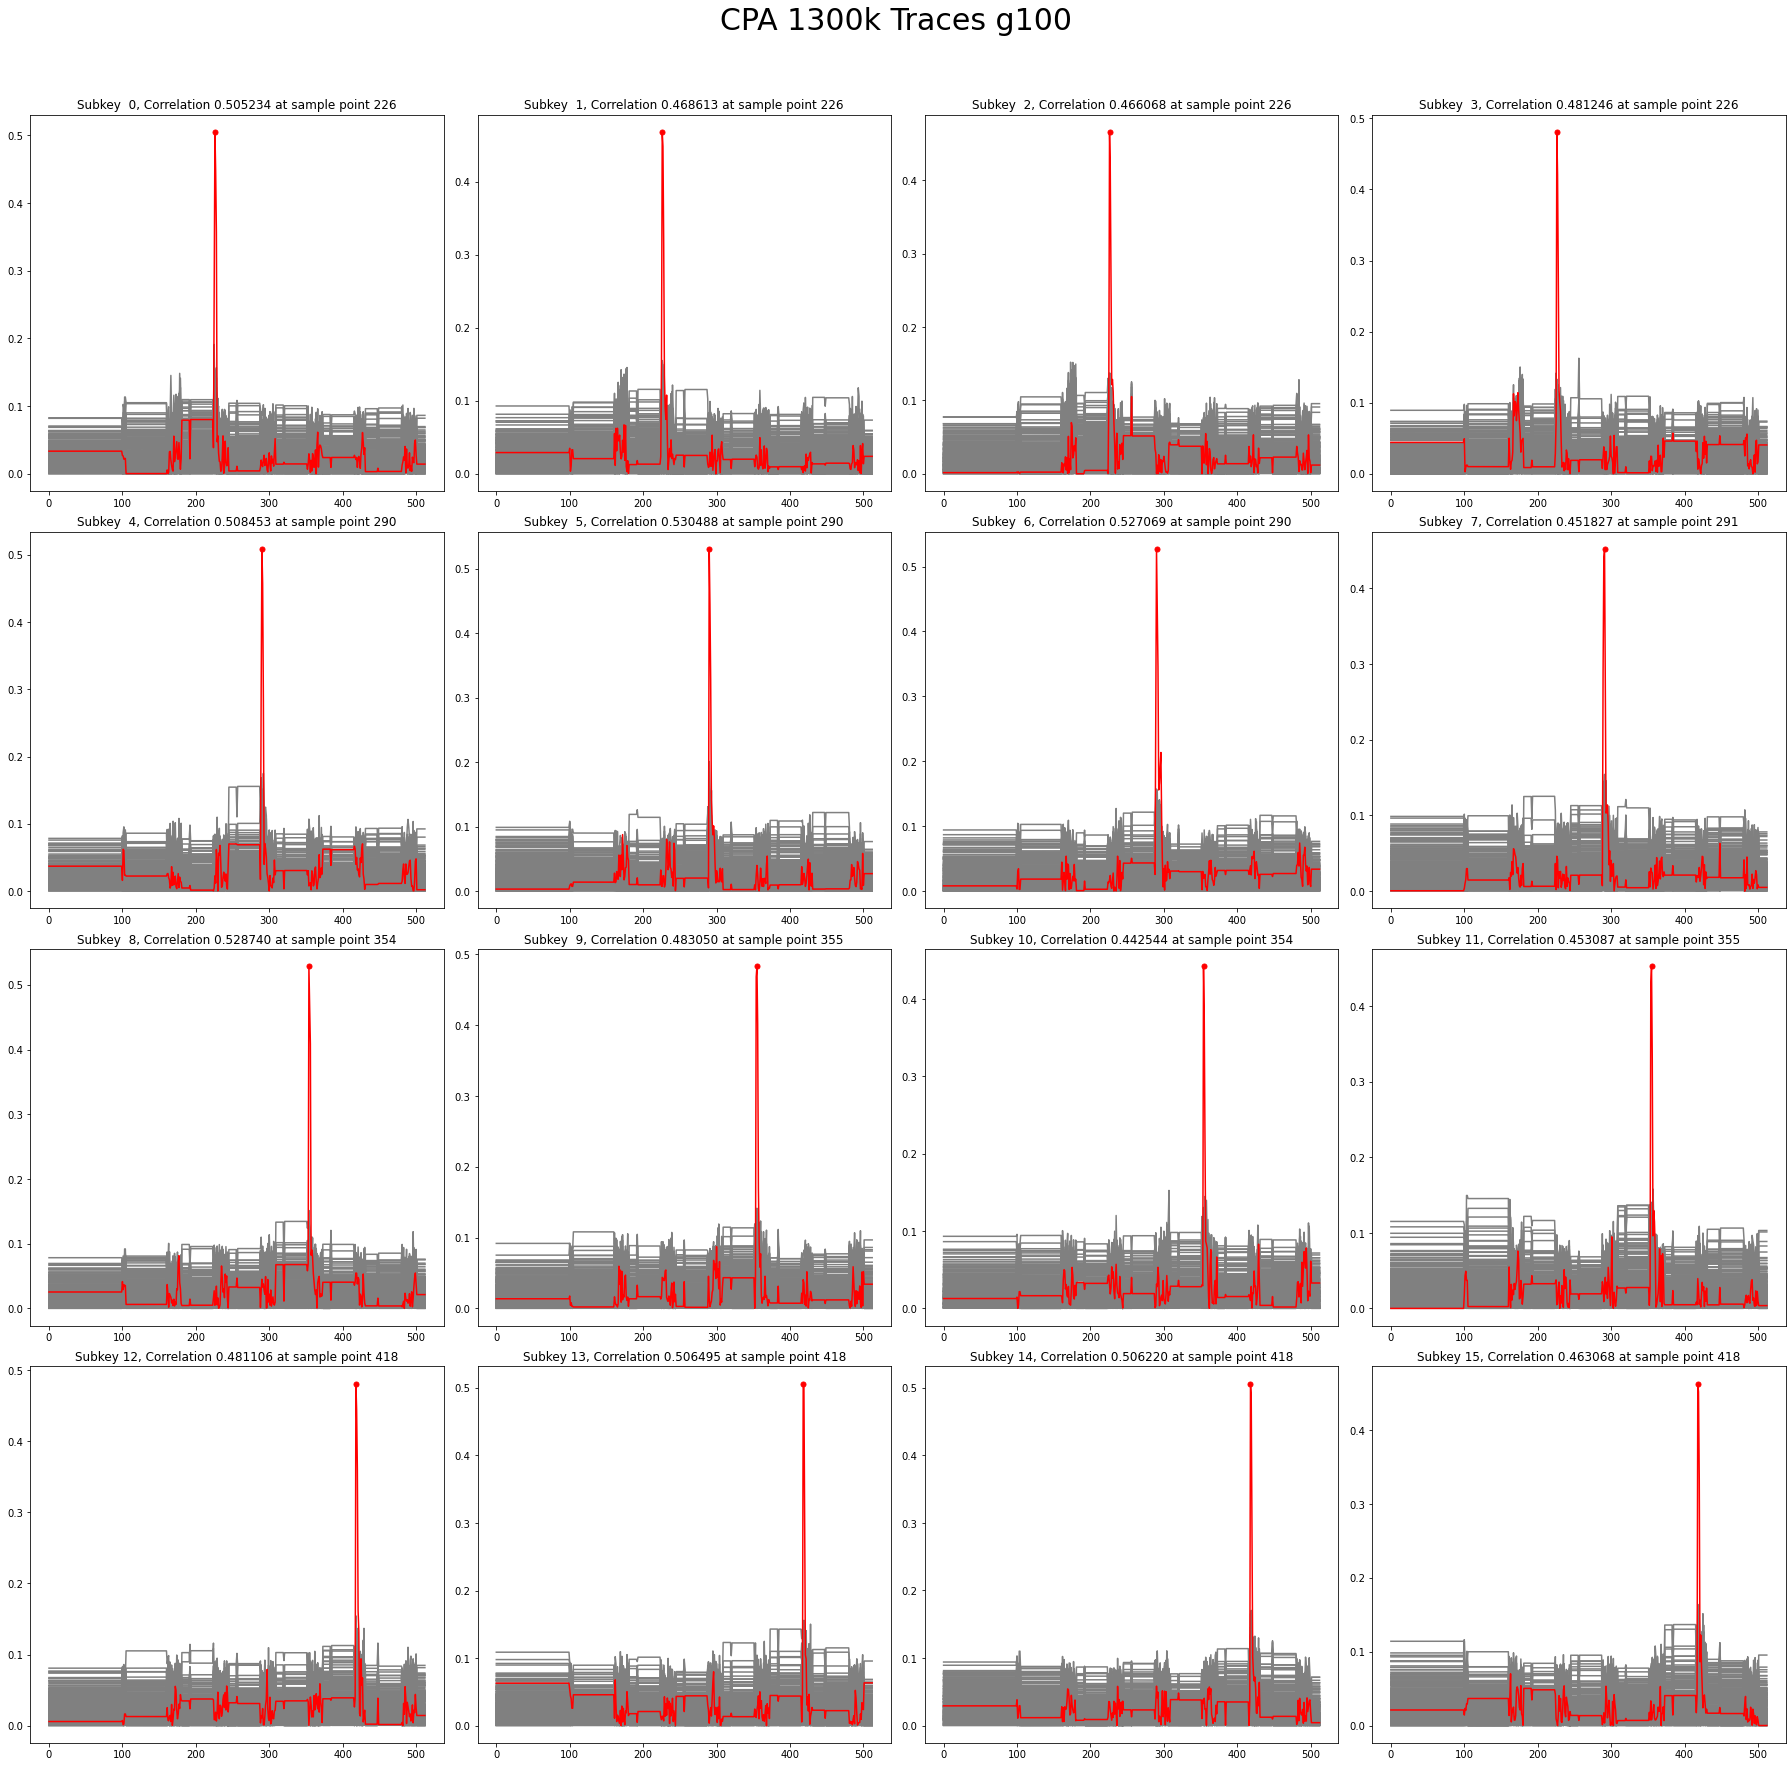

In [20]:
import pylab
plt.figure()
f, axs = plt.subplots(4,4,figsize=(25,25))
value = 1
for subkey in range (16):
    pylab.subplot(4,4,value)
    for guess in range(0, 256):
        if (guess == known_key[subkey]):
            plt.plot(abs(full_cpa_list[subkey][guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(abs(full_cpa_list[subkey][guess]),color="grey")
    value += 1
    corr = abs(full_cpa_list[subkey][known_key[subkey]])
    xmax = np.argmax(corr)
    ymax = corr.max()
    plt.plot([xmax],[ymax],marker='.', markersize=10, color="red",zorder=255)
    plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))
    
plt.tight_layout()
plt.subplots_adjust(top=0.92)
#####################################################
plt.suptitle('CPA 1300k Traces g100',size=30)
#####################################################
#plt.savefig('CPA HW(r1.s_box[0_3]) 500 Traces FULLPOWER.jpg',dpi=200)  


plt.show()

# How Many Traces Needed for Method 1

In [22]:
traces_enc_full = trace_array_y
print(len(traces_enc_full))
print(len(traces_enc_full[0]))

1300
513


In [23]:
def num_same(a, b):
    
    if len(a) != len(b):
        raise ValueError("Arrays must be same length!")
    
    #Count how many list items match up
    same = 0
    for i, _ in enumerate(a):
        if a[i] == b[i]:
            same += 1
    
    return same

In [27]:
from tqdm.notebook import trange

full_cpa_list = []
key_full_guess = []
how_many_correct_keybytes = []
is_same = 0

traces_enc = []
pt = []
known_key = key_array

for traces in trange(10,250,20): ## edit here
    #x = np.arange(5,515,15)  ###########3 edit the x here !!!!!
    x = np.arange(10,250,20)
    traces_enc = np.array(traces_enc_full[0:traces])
    pt = np.array(pt_array[0:traces])
    numtraces = len(traces_enc) 
    numpoint = len(traces_enc[0]) 
    
    key_guess = []
    cpa_list = []
    for bnum in range(0, 16):
        
        cpaoutput = [0] * 256
        maxcpa = [0] * 256
        
        for kguess in range(0, 256):

        # Initialize arrays &amp; variables to zero
            sumnum = np.zeros(numpoint)
            sumden1 = np.zeros(numpoint)
            sumden2 = np.zeros(numpoint)
        
            hyp = np.zeros(numtraces)
            for tnum in range(0, numtraces):
                st1 = pt_array[tnum][bnum] ^ kguess
                st2 = sbox[st1]
                hyp[tnum] = HW[st1 ^ st2]
            # Mean of hypothesis
            meanh = np.mean(hyp, dtype=np.float64)

            # Mean of all points in trace
            meant = np.mean(traces_enc, axis=0, dtype=np.float64)

            # For each trace, do the following
            for tnum in range(0, numtraces):
                hdiff = (hyp[tnum] - meanh)
                tdiff = traces_enc[tnum, :] - meant

                sumnum = sumnum + (hdiff * tdiff)
                sumden1 = sumden1 + hdiff * hdiff
                sumden2 = sumden2 + tdiff * tdiff

            cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
            maxcpa[kguess] = max(abs(cpaoutput[kguess]))

        cpa_list.append(cpaoutput)
        sorted_args = np.argsort(maxcpa)[::-1]
        key_guess.append(sorted_args[0])

    full_cpa_list.append(cpa_list)
    key_full_guess.append(key_guess)
    is_same = num_same(key_guess,known_key)
    how_many_correct_keybytes.append(is_same)
    
    print("For %2d traces, correct key byte are %2d" %(traces,is_same))
    print("\n")

  0%|          | 0/12 [00:00<?, ?it/s]

For 10 traces, correct key byte are  0


For 30 traces, correct key byte are  0


For 50 traces, correct key byte are  4


For 70 traces, correct key byte are  8


For 90 traces, correct key byte are 12


For 110 traces, correct key byte are 14


For 130 traces, correct key byte are 15


For 150 traces, correct key byte are 16


For 170 traces, correct key byte are 16


For 190 traces, correct key byte are 16


For 210 traces, correct key byte are 16


For 230 traces, correct key byte are 16




In [37]:
text_arrays_full = pt_array
traces_enc_full = np.array(trace_array_y)

full_key_guess = []
full_diffs_list = []
how_many_correct_keybytes = []
is_same = 0
known_key = key_array
trace_array_y = []
text_array = []

for traces in trange(10,500,20):
    trace_array_y = np.array(traces_enc_full[0:traces])
    text_array = np.array(text_arrays_full[0:traces])
    
    key_guess = []
    diffs_list = []
    for subkey in range(0, 16):
        max_diffs = [0]*256
        full_diffs = [0]*256
        for guess in range(0, 256):
            full_diff_trace = calculate_diffs(guess, subkey)
            max_diffs[guess] = np.max(full_diff_trace)
            full_diffs[guess] = full_diff_trace
        
        diffs_list.append(full_diffs[:])
        sorted_args = np.argsort(max_diffs)[::-1]
        key_guess.append(sorted_args[0])
    
    full_diffs_list.append(full_diffs_list)
    full_key_guess.append(key_guess)
    is_same = num_same(key_guess,known_key)
    how_many_correct_keybytes.append(is_same)
    
    print("For %2d traces, correct key byte are %2d" %(traces,is_same))
    print("\n")

  0%|          | 0/25 [00:00<?, ?it/s]

<ipython-input-13-baf58ec002e4>:20: RuntimeWarning: Mean of empty slice.
  zero_avg_calc = np.asarray(zero_list_calc).mean(axis=0)
<ipython-input-13-baf58ec002e4>:19: RuntimeWarning: Mean of empty slice.
  one_avg_calc = np.asarray(one_list_calc).mean(axis=0)


For 10 traces, correct key byte are  0


For 30 traces, correct key byte are  1


For 50 traces, correct key byte are  1


For 70 traces, correct key byte are  6


For 90 traces, correct key byte are 12


For 110 traces, correct key byte are 13


For 130 traces, correct key byte are 13


For 150 traces, correct key byte are 15


For 170 traces, correct key byte are 16


For 190 traces, correct key byte are 16


For 210 traces, correct key byte are 16


For 230 traces, correct key byte are 16


For 250 traces, correct key byte are 16


For 270 traces, correct key byte are 16


For 290 traces, correct key byte are 16


For 310 traces, correct key byte are 16


For 330 traces, correct key byte are 16


For 350 traces, correct key byte are 16


For 370 traces, correct key byte are 16


For 390 traces, correct key byte are 16


For 410 traces, correct key byte are 16


For 430 traces, correct key byte are 16


For 450 traces, correct key byte are 16


For 470 traces, correct key byte are 16

# CPA Number of traces vs. correctly guessed key bytes

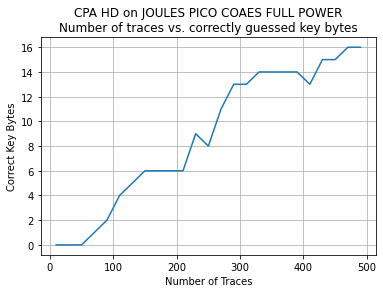

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

# need to make adjustment here for600sample-Copy1 further experienments
# here x is 45 because we run 45 intervals of traces from 5 to 230 with incresing step of 5
### edit below
#x = np.arange(2,45,2) 
### edit above

plt.plot(x, how_many_correct_keybytes)
plt.grid()
plt.xlabel('Number of Traces')
plt.ylabel('Correct Key Bytes')
############################################## edit here
plt.title('CPA HD on JOULES PICO COAES FULL POWER\nNumber of traces vs. correctly guessed key bytes')
plt.savefig('tracs_vs_bytes.jpg',dpi=100) # save jpg/png

# Plot for the correlation vs traces

In [19]:
### take the max correct 16 subkeys out of the 45 experienments 
### so it is a 45x16x1 matrix for the correct key guess 1/256
### 45x16x255 matrix for the rest of the guesses keybyte

correct_full_list = []  #45x16x1
else_full_list = []  #45x16x255

for i in range (len(how_many_correct_keybytes)):
    correct_16_subbyte_list = []  #16x1
    else_16_subbyte_list = []  #16x255
    
    for subkey in range (16):
        max_correct = []  #1
        max_else = []  #255
        
        for guess in range(0, 256):  #take the max correlation of the correct key guess 
            if (guess == known_key[subkey]):
                ### edit below -- the list name need to be change for the especific name 
                corr = full_cpa_list[i][subkey][guess] 
                ### edit above -- the list name need to be change for the especific name 
                ymax = np.nanmax(abs(corr))
                #print(ymax)
                max_correct.append(ymax)
            else:
                corr = full_cpa_list[i][subkey][guess]
                ymax = np.nanmax(abs(corr))
                max_else.append(ymax)
                
        correct_16_subbyte_list.append(max_correct)
        
        else_16_subbyte_list.append(max_else)
        
    correct_full_list.append(correct_16_subbyte_list)
    
    else_full_list.append(else_16_subbyte_list)

print(len(correct_full_list))
print(len(correct_full_list[0]))
print(len(correct_full_list[0][0]))
print(len(else_full_list))
print(len(else_full_list[0]))
print(len(else_full_list[0][0]))

<ipython-input-19-09d11ef8ad17>:21: RuntimeWarning: All-NaN slice encountered
  ymax = np.nanmax(abs(corr))
<ipython-input-19-09d11ef8ad17>:26: RuntimeWarning: All-NaN slice encountered
  ymax = np.nanmax(abs(corr))


25
16
1
25
16
255


In [20]:
### make the correct key correlation to 16x45x1 matrix

corr_plot_full = []
for i in range (16):
    corr_plot = []
    for j in range (len(how_many_correct_keybytes)):
        corr_plot.append(correct_full_list[j][i])  ## invert the i and j 
    corr_plot_full.append(corr_plot)

In [45]:
full_peak_corr = []
for i in range (16):
    full_peak_corr.append(corr_plot_full[i][last][0])

In [46]:
full_peak_corr

[0.5750061039450892,
 0.3069753025383828,
 0.27335284251573744,
 0.31864408579925896,
 0.24771975893194295,
 0.2926025892667577,
 0.31874759503987404,
 0.25863038735243676,
 0.31986648263721623,
 0.3957389617961829,
 0.33268011481068344,
 0.23489085563863388,
 0.27326708517132187,
 0.4018084588981903,
 0.2534466896093255,
 0.2675950400346094]

In [47]:
np.array(full_peak_corr).tofile("full_peak_corr.bin")

In [48]:
### make the else key correlation to 16x255x45 matrix

else_16 = []
for i in range (16):
    else_255 = []
    for j in range (len(else_full_list[0][0])):
        else_list = []
        for k in range (len(how_many_correct_keybytes)):
            else_list.append(else_full_list[k][i][j])  ## invert the i, j and k 
        else_255.append(else_list)
    else_16.append(else_255)

<Figure size 432x288 with 0 Axes>

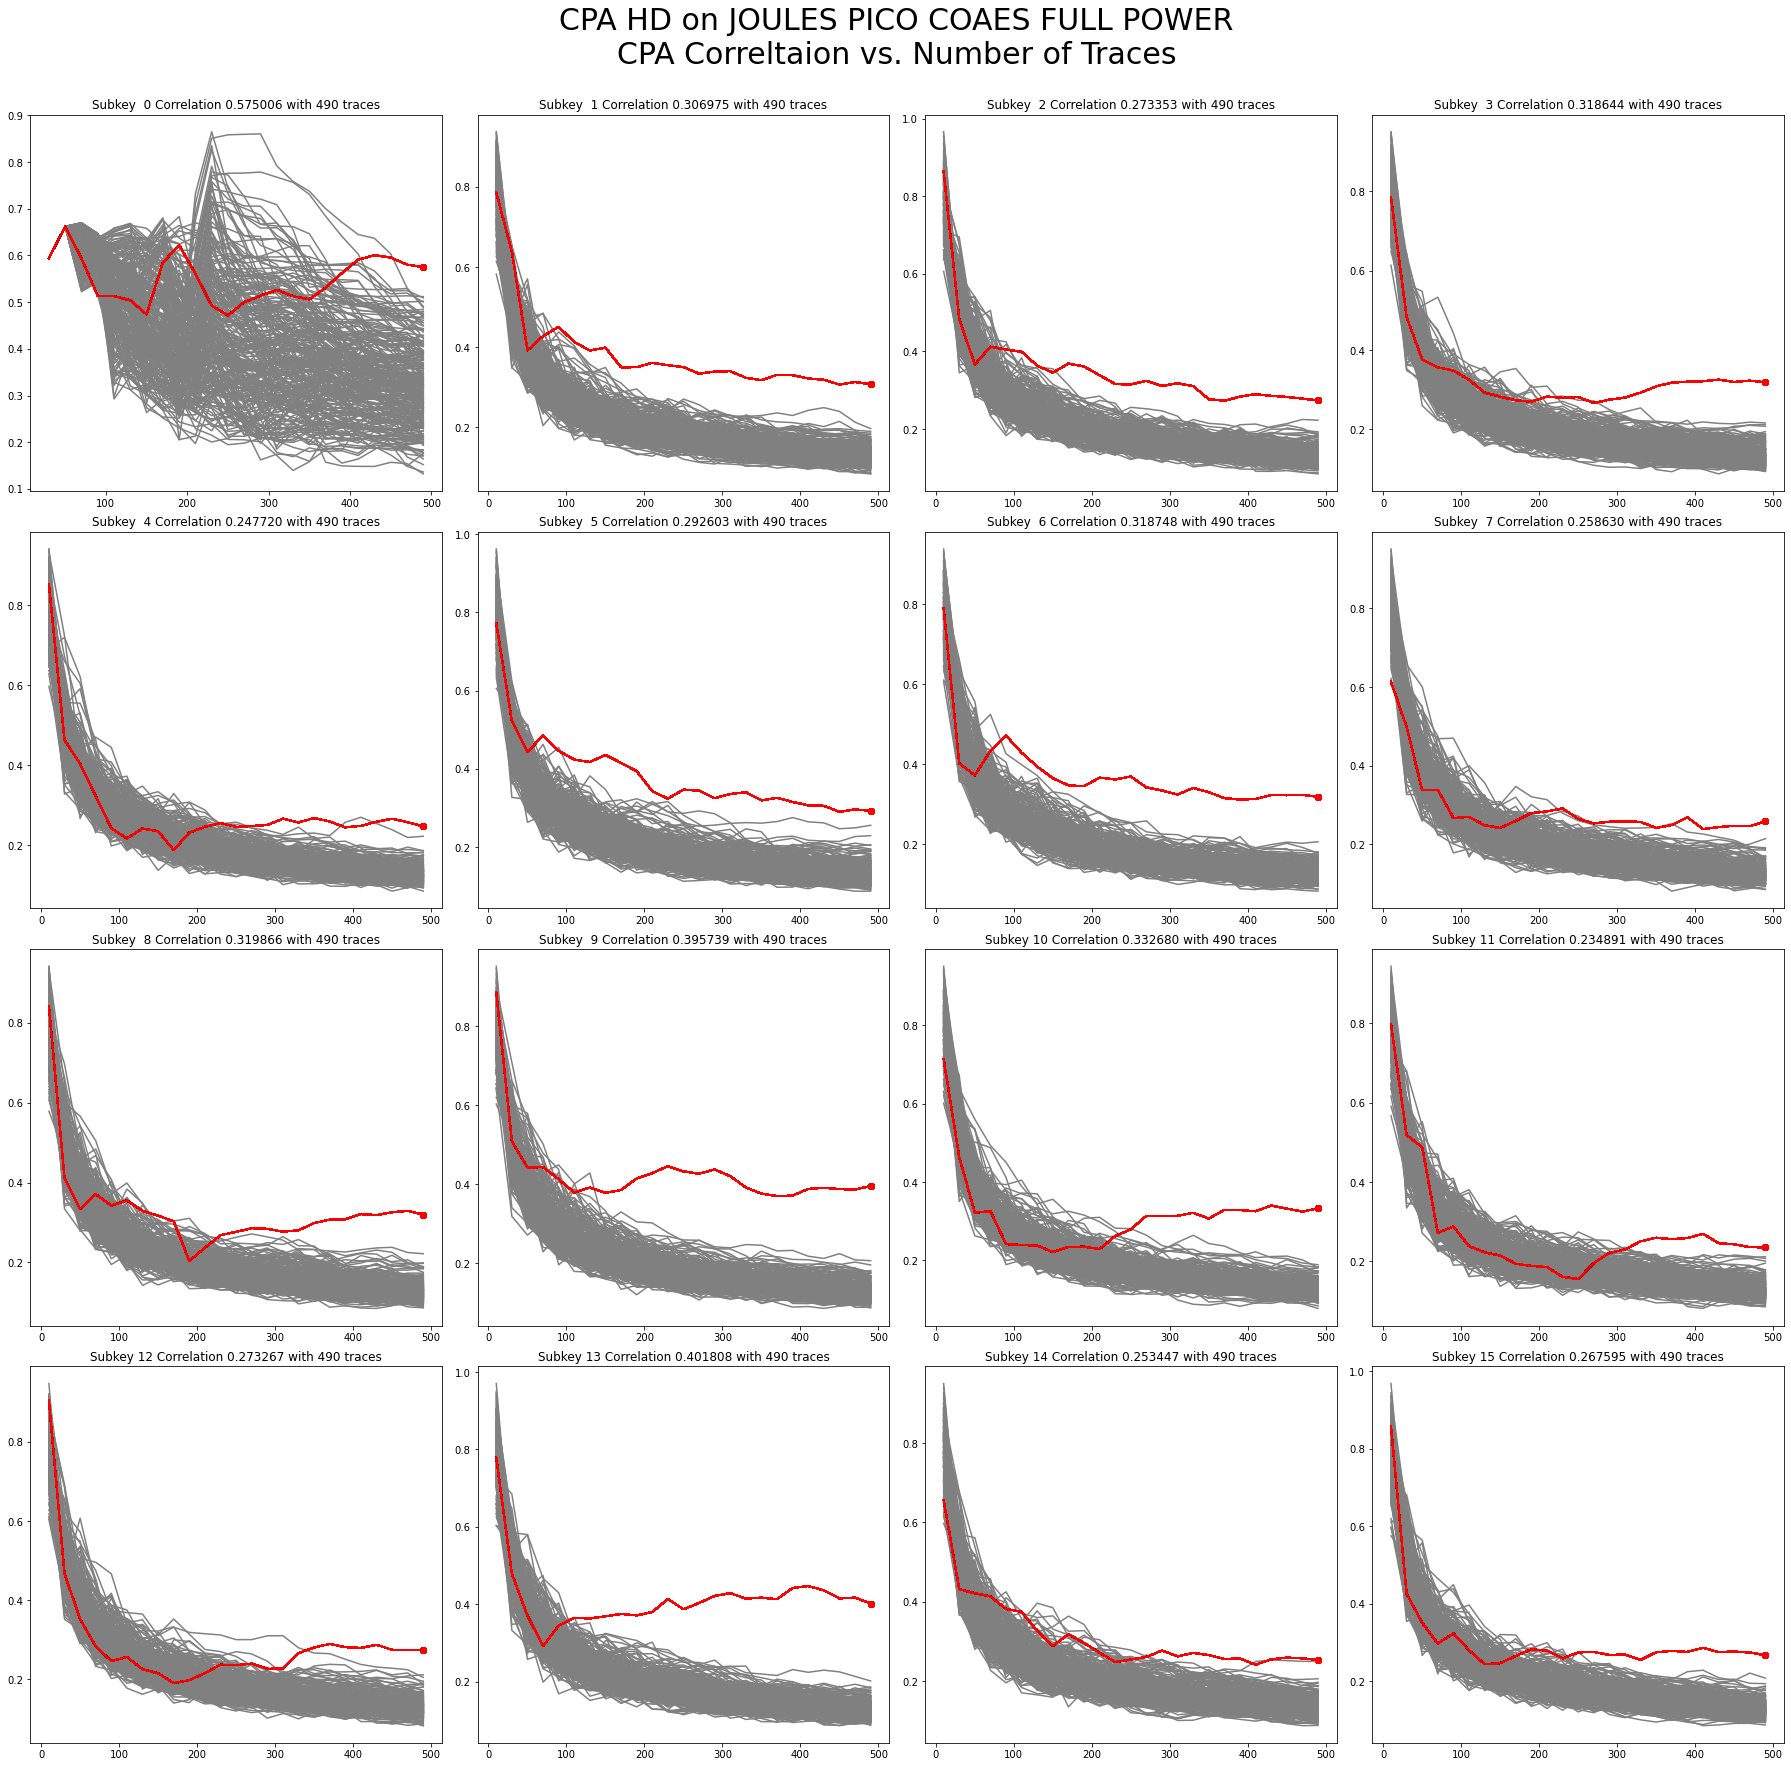

In [49]:
### plot a 16 subplot, 16 subkeys
### each subkeys has 255 guesses 
### each guesses has 45 points in this experienment

import pylab

import warnings  #ignore the subplot warmings of pylab.subplot(4,4,subkey+1)
warnings.filterwarnings('ignore')

plt.figure()

f, axs = plt.subplots(4,4,figsize=(25,25))  #making a 4x4 subplot, figsize 25x25

for subkey in range (16):
    for guess in range (len(else_16[0])):
        pylab.subplot(4,4,subkey+1)  # marking the position of each subplot
        ### edit below, different experienment needs different xaxis
        #x = np.arange(5, 230, 5)  
        ### edit above
        y = else_16[subkey][guess]  #plotting the 255 guesses
        plt.plot(x,y,color='grey')  #set wrong guesses as grey
        y1 = corr_plot_full[subkey]  #plotting the correct 1 guesses
        plt.plot(x,y1,color='red',linewidth=1.5, linestyle='-',zorder=255)  #set correct guesses as red
        last = len(x)-1
        val = corr_plot_full[subkey][last][0]
        plt.title('Subkey %2d Correlation %2f with %2d traces' %(subkey,val,x[last]))
        plt.plot(x[last],val,marker='.', markersize=10, color="red",zorder=255)
        
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('CPA HD on JOULES PICO COAES FULL POWER\nCPA Correltaion vs. Number of Traces', size=30)

plt.savefig('corr_vs_traces.jpg',dpi=200)  
            
plt.show()

<Figure size 432x288 with 0 Axes>

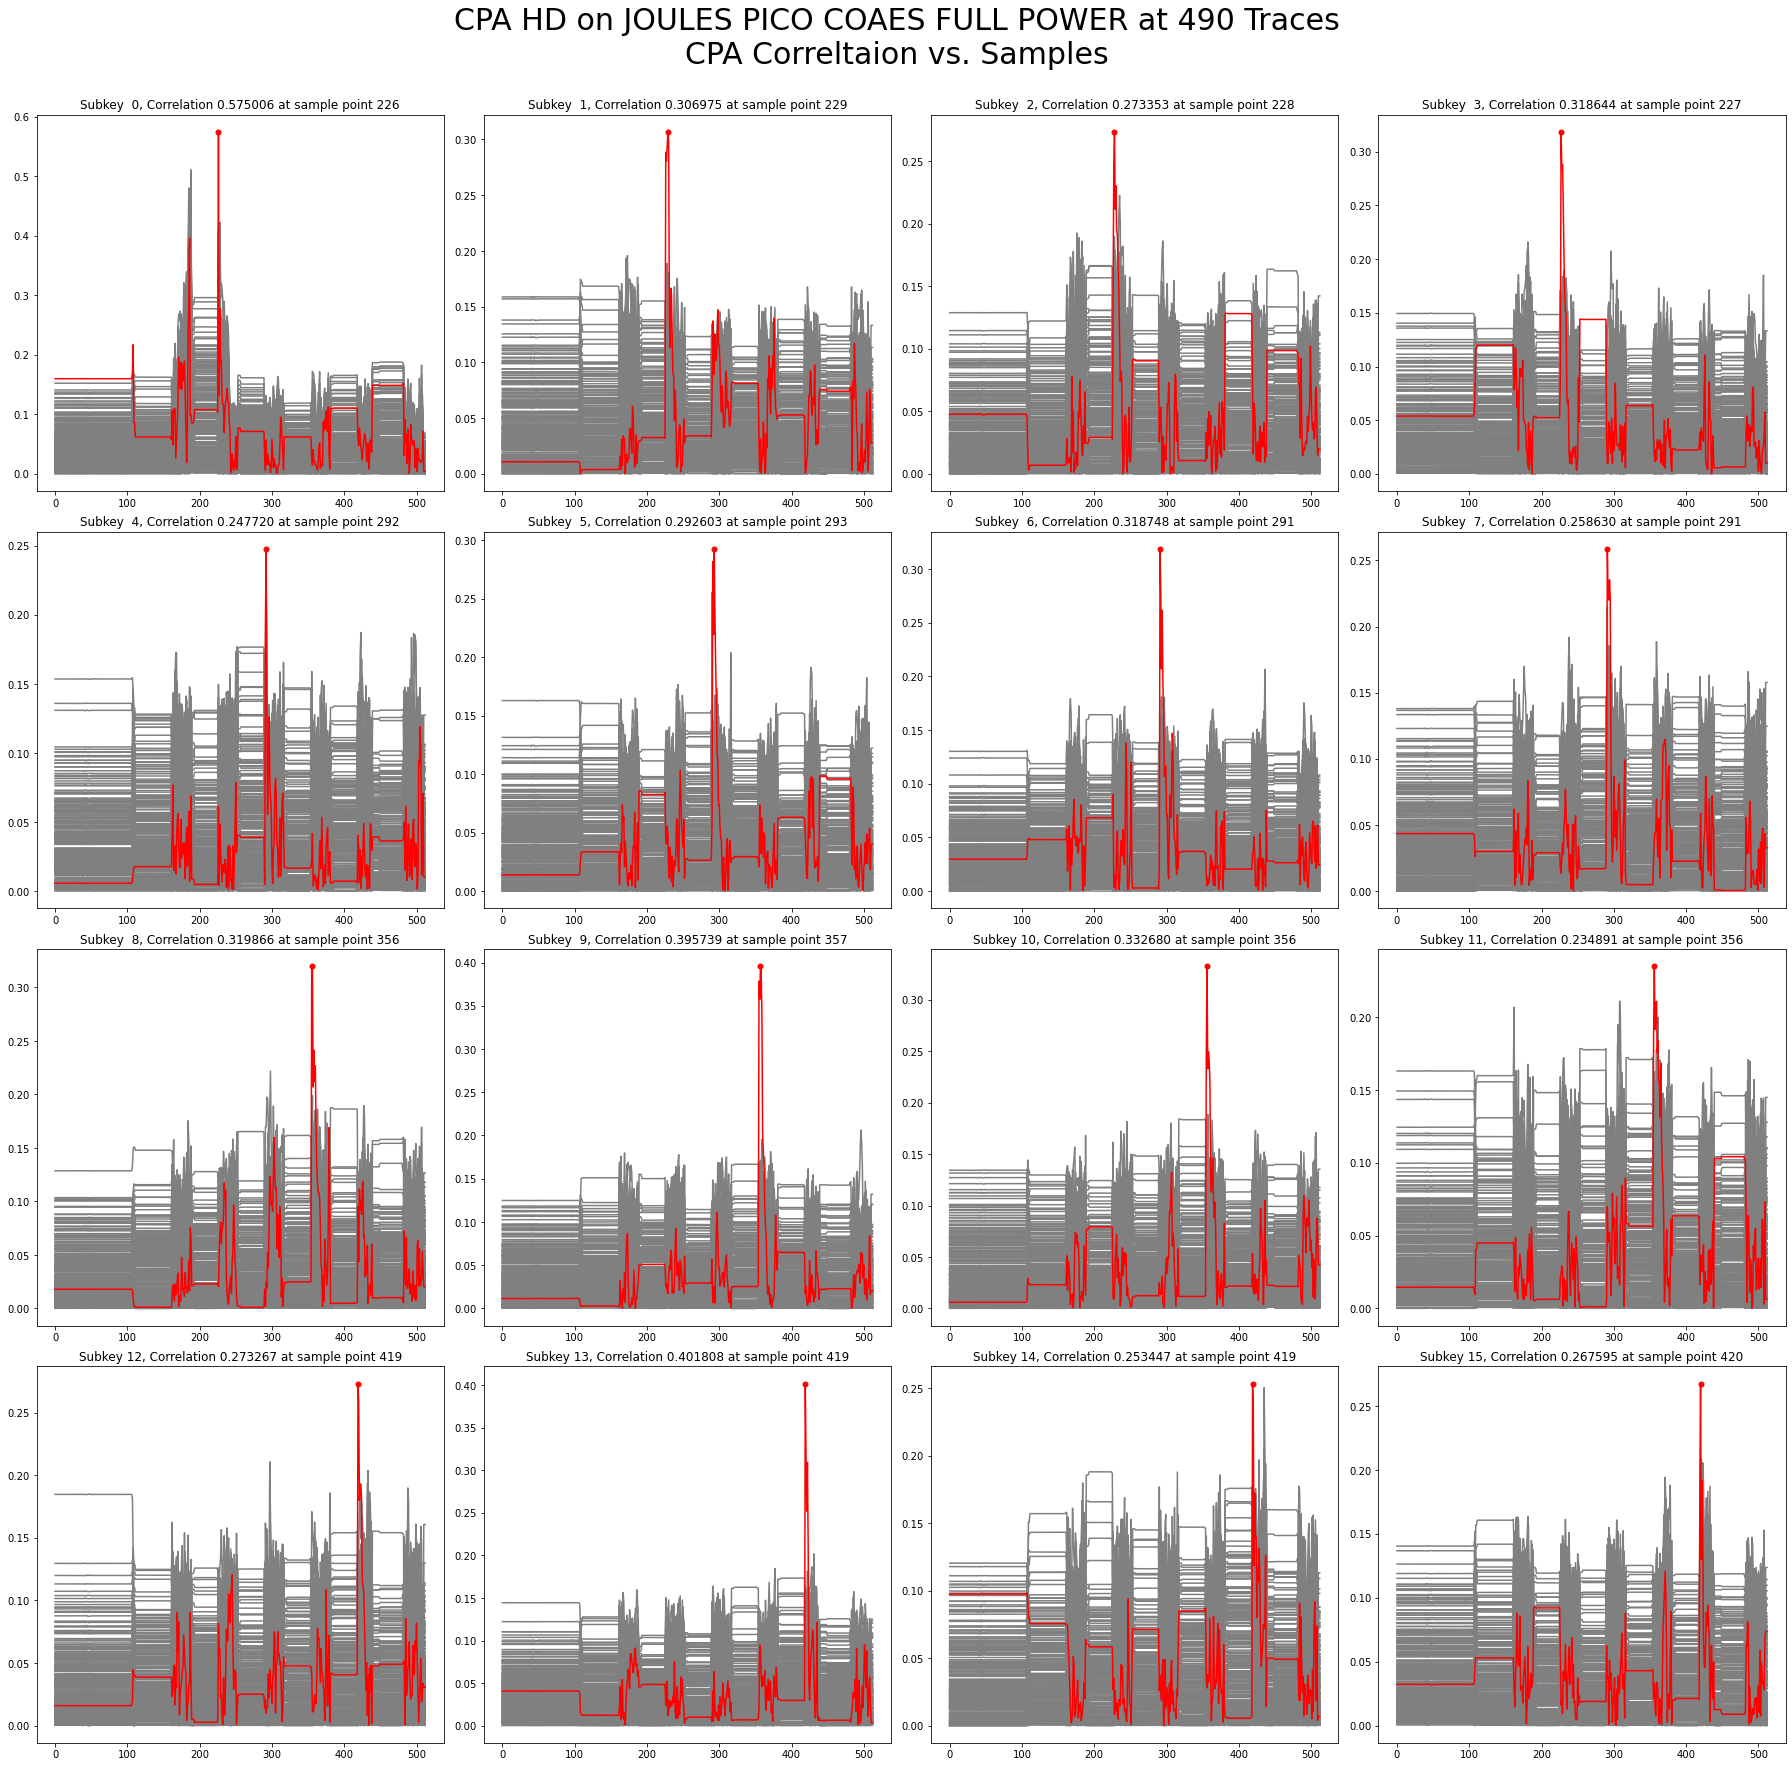

In [50]:
import pylab
plt.figure()
f, axs = plt.subplots(4,4,figsize=(25,25))
value = 1
trial = last
tracesnumber = x[last]
for subkey in range (16):
    pylab.subplot(4,4,value)
    for guess in range(0, 256):
        if (guess == known_key[subkey]):
            plt.plot(abs(full_cpa_list[trial][subkey][guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(abs(full_cpa_list[trial][subkey][guess]),color="grey")
    value += 1
    corr = abs(full_cpa_list[trial][subkey][known_key[subkey]])
    xmax = np.argmax(corr)
    ymax = np.nanmax(abs(corr))
    plt.plot([xmax],[ymax],marker='.', markersize=10, color="red",zorder=255)
    plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))
    
plt.tight_layout()
plt.subplots_adjust(top=0.92)
#####################################################
plt.suptitle('CPA HD on JOULES PICO COAES FULL POWER at %2d Traces\nCPA Correltaion vs. Samples'%(tracesnumber),size=30)
#####################################################
plt.savefig('corr_vs_samples_2.jpg',dpi=200)  


plt.show()